## Generative Adverserial Network Quiz

This notebook is contains guide and questions in order to complete the quiz. Plase mind that this quiz is semi-progressive, means that in order to answer future questions you might have to complete the previous one. 


#  <font color="red">**QUESTION 1**</font> 
GAN is a generative model. Please select all box that represents a generative models :
- [x] Naive Bayes
- [ ] Logistic Regression
- [ ] Support Vector Machine
- [ ] K-Nearest Neighbor

#  <font color="red">**QUESTION 2**</font> 
What does adversarial refers to in GAN ? 
- [x] Loss function
- [ ] Optimizer
- [ ] Input
- [ ] Output

#  <font color="red">**QUESTION 3**</font> 
Select all correct boxes  
- [ ] Generator takes input from Discriminator
- [ ] Discriminator tries to maximize the loss function
- [ ] Discriminator tries to generate a random noise 
- [x] GAN input is random vector

Now, let's your comprehension in implementing GAN (DC GAN). These codes contains blank ("?" marks) that you should fill to complete and andswer the questions.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Reshape, UpSampling2D, MaxPooling2D, Activation
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

from PIL import Image

### Load MNIST Dataset
In this quiz, we will use MNIST Fashion dataset. Please write your code on the "??" mark

In [0]:
# # Load mnist fashion data
# (X_train, y_train), (X_test, y_test) = ?? 

# # Do a basic normalization as shown in class
# X_train = ??

# X_train = X_train[:, :, :, None]
# X_test = X_test[:, :, :, None]

In [0]:
# Load mnist fashion data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

X_train = (X_train.astype(np.float32) - 127.5)/127.5 
X_train = X_train[:, :, :, None]
X_test = X_test[:, :, :, None]

In [43]:
print (X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)



#  <font color="red">**QUESTION 4**</font> 
To ensure you have correctly load the data, what is the shape of X_train and X_test respectively?
- [x] (60000, 28, 28, 1) and (10000, 28, 28, 1)
- [ ] (50000, 28, 28, 1) and (5000, 28, 28, 1)
- [ ] (60000, 32, 32, 1) and (10000, 32, 32, 1)
- [ ] (50000, 32, 32, 1) and (5000, 32, 32, 1)

#  <font color="red">**QUESTION 5**</font> 
While loading the Mnist dataset, in line 4, what does `X_train = (X_train.astype(np.float32) - 127.5)/127.5 ` means ?

- [x] Rescale the data into within the interval of -1 to 1
- [ ] Rescale the data into within the interval of 0 to 1
- [ ] Denormalize data
- [ ] Reshape data




### Generator Model
Create a generator for your GAN

In [0]:
# def generator_model():
#     model = Sequential([
#         Dense(1024, input_dim=100, activation='tanh'),
#         Dense(128*7*7),
#         BatchNormalization(),
#         Activation('tanh'),

#         # Do a reshape to make data shape into (7, 7, 128). Hint: Use Reshape()
#         ??

#         UpSampling2D(size=(2, 2)),
#         Conv2D(64, (5, 5), padding='same', activation='tanh'),

#         # Do upsampling with size (2,2). Hint: use UpSampling2D()
#         ??

#         # Complete the conv2D with total number of filter=1 and filter size=5x5 
#         Conv2D(?, (?, ?), padding='same', activation='tanh')
#     ])
#     return model

In [0]:
def generator_model():
    model = Sequential([
        Dense(1024, input_dim=100, activation='tanh'),
        Dense(128*7*7),
        BatchNormalization(),
        Activation('tanh'),
        Reshape((7, 7, 128)),
        UpSampling2D(size=(2, 2)),
        Conv2D(64, (5, 5), padding='same', activation='tanh'),
        UpSampling2D(size=(2, 2)),
        Conv2D(1, (5,5), padding='same', activation='tanh')
    ])
    return model

In [46]:
generator_model().summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_23 (Dense)             (None, 6272)              6428800   
_________________________________________________________________
batch_normalization_8 (Batch (None, 6272)              25088     
_________________________________________________________________
activation_8 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)      

#  <font color="red">**QUESTION 6**</font> 
How many params does the generator_model has ? 
- [ ] 6,765,313
- [x] 6,763,777
- [ ] 6,751,233
- [ ] 12,544

#  <font color="red">**QUESTION 7**</font> 
If you change the last convolution layer's filter shape into 7x7, what will be the final total parameters ?
- [x] 6,765,313
- [ ] 6,763,777
- [ ] 6,741,233
- [ ] 12,700

### Discriminator Model
Create a discriminator for your GAN

In [0]:
# def discriminator_model():
#     model = Sequential([
#         Conv2D(64, (5, 5), input_shape=(28, 28, 1), padding='same', activation='tanh'),
        
#         # add max pooling with pool size 2x3
#         ?? 
#         Conv2D(128, (5, 5),activation='tanh'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Flatten(),

#         # Add Dense containing 1024 neurons with activation function ='tanh' 
#         ?

#         # Add single neuron (dense) with actiation='sigmoid'
#         ?
#     ])
#     return model

In [0]:
def discriminator_model():
    model = Sequential([
        Conv2D(64, (5, 5), input_shape=(28, 28, 1), padding='same', activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (5, 5),activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1024, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [48]:
discriminator_model().summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              3277824   
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

#  <font color="red">**QUESTION 8**</font> 
What does Flatten() layer means in the Discriminator?
- [ ] To make the data standardized 
- [ ] To make the data mean = 0
- [x] To reshape the data into one dimensional vector
- [ ] To compile the previous layers

### GAN = Generator + Discriminator

In [0]:
def combine_model(g, d):
    model = Sequential()
    model.add(g)
    model.add(d)
    return model

## Training Functions
untuk melakukan training diperlukan BATCH_SIZE yang merupakan banyaknya gambar yang di train tiap epochs nya. Tiap piksel gambar akan dikonversikan menjadi nilai antara [-1,1). Hasil training akan disimpan pada file discriminator dan generator.

### Combine Generated Image

Combine Image adalah fungsi untuk menggabungkan gambar kedalam satu frame.

In [0]:
def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(np.sqrt(num))
    height = int(np.ceil(float(num)/width))
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1]),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
            img[:, :, 0]
    return image

### Training Function

In [0]:
def train_gan(X_train, Y_train, batch_size, epochs, g, d, save_every=500, print_every=100):
    
    # ukuran vektor z
    z_size = g.layers[0].input_shape[1]
    
    # gabungkan Discriminator dan Generator
    d.trainable = False # set Discriminator tidak bisa dilatih sebelum digabung
    d_on_g = combine_model(g, d)    
    dg_optim = RMSprop (lr=0.0005)
    g_optim = RMSprop (lr=0.0005)
    d_on_g.compile(loss='binary_crossentropy', optimizer=dg_optim)
    
    g.compile(loss='binary_crossentropy', optimizer=g_optim)
    
    # set Discriminator agar bisa dilatih kembali
    d.trainable = True
    d_optim = RMSprop (lr=0.0005)
    d.compile(loss='binary_crossentropy', optimizer=d_optim)
    
    print("Number of batches", int(X_train.shape[0]/batch_size))
    
    # mulai pelatihan
    for epoch in range(epochs):
        print("\n-------------------------------\nEpoch :", epoch)        
        
        for index in range(int(X_train.shape[0]/batch_size)):
            
            # bangkitkan matrix z secara acak
            noise = np.random.uniform(-1, 1, size=(batch_size, z_size))
            
            # bangkitkan data gambar palsu dari matrix z
            generated_images = g.predict(noise, verbose=0)
            
            # ambil data gambar asli
            image_batch = X_train[index*batch_size:(index+1)*batch_size]
            
            if index % save_every == 0:
                image = combine_images(generated_images)
                image = image*127.5+127.5
                # Image.fromarray(image.astype(np.uint8)).save("train_ep"+
                #     str(epoch)+"_"+str(index)+".png")
                
                plt.imshow(image, cmap=plt.get_cmap('gray'))
                plt.axis('off')
                plt.show()
                
            # gabungkan data untuk pelatihan Discriminator
            X = np.concatenate((image_batch, generated_images))
            y = [1] * batch_size + [0] * batch_size
            
            # latih Discriminator
            d_loss = d.train_on_batch(X, y)           
            
            # bangkitkan matrix z secara acak untuk pelatihan Generator
            noise = np.random.uniform(-1, 1, (batch_size, z_size))
            
            # set Discriminator tidak bisa dilatih sebelum digabung
            d.trainable = False            
            
            # latih Generator
            g_loss = d_on_g.train_on_batch(noise, [1] * batch_size)
            
            # print loss
            if index % print_every == 0: 
                print("batch %d, g_loss : %f, d_loss : %f" % (index, g_loss, d_loss))
            
            # set Discriminator agar bisa dilatih kembali
            d.trainable = True       
            
        
    return g, d

## Training Process

### Initialize Model

In [0]:
z_size = 100
g_model = generator_model()
d_model = discriminator_model()

### Train GAN

Number of batches 266

-------------------------------
Epoch : 0


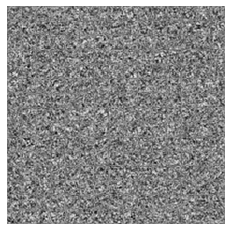

batch 0, g_loss : 0.000459, d_loss : 0.686806
batch 100, g_loss : 0.717334, d_loss : 0.795293
batch 200, g_loss : 1.039432, d_loss : 0.589327

-------------------------------
Epoch : 1


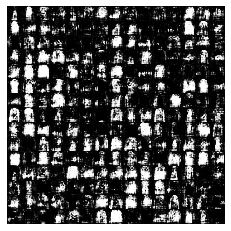

batch 0, g_loss : 1.790560, d_loss : 0.474032
batch 100, g_loss : 2.347962, d_loss : 0.433002
batch 200, g_loss : 2.474022, d_loss : 0.367105

-------------------------------
Epoch : 2


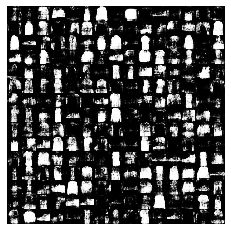

batch 0, g_loss : 1.164890, d_loss : 0.461818
batch 100, g_loss : 1.780279, d_loss : 0.372362
batch 200, g_loss : 1.902860, d_loss : 0.453196

-------------------------------
Epoch : 3


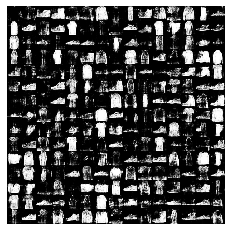

batch 0, g_loss : 1.869595, d_loss : 0.482548
batch 100, g_loss : 2.236483, d_loss : 0.463894
batch 200, g_loss : 0.806894, d_loss : 0.574703

-------------------------------
Epoch : 4


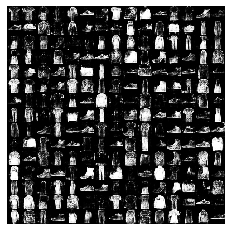

batch 0, g_loss : 0.988809, d_loss : 0.517232
batch 100, g_loss : 1.144150, d_loss : 0.533116
batch 200, g_loss : 1.165939, d_loss : 0.445333

-------------------------------
Epoch : 5


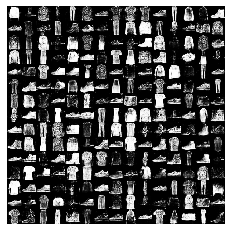

batch 0, g_loss : 1.693721, d_loss : 0.421935
batch 100, g_loss : 2.156312, d_loss : 0.461435
batch 200, g_loss : 2.033993, d_loss : 0.405995

-------------------------------
Epoch : 6


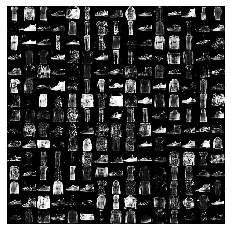

batch 0, g_loss : 2.306160, d_loss : 0.473298
batch 100, g_loss : 1.543478, d_loss : 0.378134
batch 200, g_loss : 2.024662, d_loss : 0.368224

-------------------------------
Epoch : 7


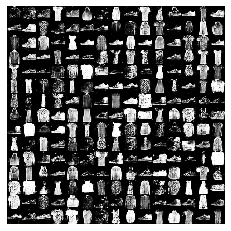

batch 0, g_loss : 1.521653, d_loss : 0.385220
batch 100, g_loss : 1.857238, d_loss : 0.344379
batch 200, g_loss : 2.028374, d_loss : 0.324106

-------------------------------
Epoch : 8


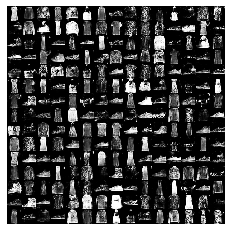

batch 0, g_loss : 1.603962, d_loss : 0.347963
batch 100, g_loss : 2.497040, d_loss : 0.236127
batch 200, g_loss : 1.651636, d_loss : 0.253506

-------------------------------
Epoch : 9


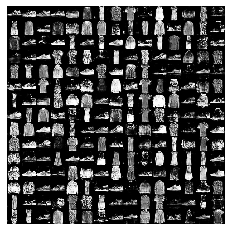

batch 0, g_loss : 2.672908, d_loss : 0.289894
batch 100, g_loss : 1.690201, d_loss : 0.234514
batch 200, g_loss : 3.126745, d_loss : 0.238254

-------------------------------
Epoch : 10


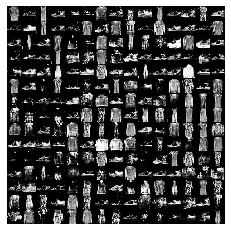

batch 0, g_loss : 2.509246, d_loss : 0.162646
batch 100, g_loss : 2.951368, d_loss : 0.165217
batch 200, g_loss : 1.102074, d_loss : 0.067859

-------------------------------
Epoch : 11


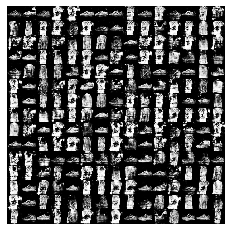

batch 0, g_loss : 5.762472, d_loss : 0.526716
batch 100, g_loss : 3.081621, d_loss : 0.061217
batch 200, g_loss : 0.315560, d_loss : 0.058126

-------------------------------
Epoch : 12


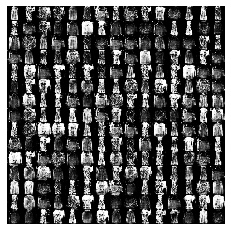

batch 0, g_loss : 0.699241, d_loss : 0.083428
batch 100, g_loss : 0.319608, d_loss : 0.081338
batch 200, g_loss : 2.756911, d_loss : 0.063713

-------------------------------
Epoch : 13


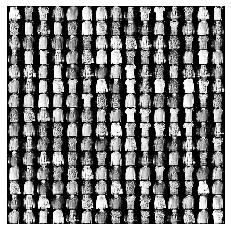

batch 0, g_loss : 1.703645, d_loss : 0.316555
batch 100, g_loss : 2.771081, d_loss : 0.197239
batch 200, g_loss : 2.868848, d_loss : 0.192463

-------------------------------
Epoch : 14


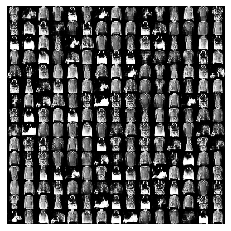

batch 0, g_loss : 2.923460, d_loss : 0.151207
batch 100, g_loss : 3.505537, d_loss : 0.159947
batch 200, g_loss : 1.882303, d_loss : 0.201997

-------------------------------
Epoch : 15


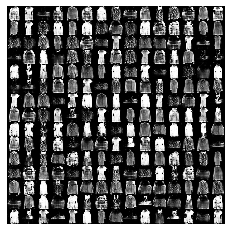

batch 0, g_loss : 1.808946, d_loss : 0.172128
batch 100, g_loss : 3.423235, d_loss : 0.142539
batch 200, g_loss : 2.346448, d_loss : 0.152421

-------------------------------
Epoch : 16


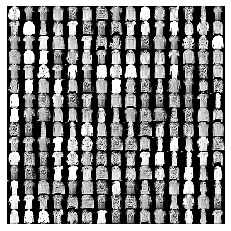

batch 0, g_loss : 4.451709, d_loss : 0.220699
batch 100, g_loss : 3.984817, d_loss : 0.173545
batch 200, g_loss : 2.722647, d_loss : 0.121051

-------------------------------
Epoch : 17


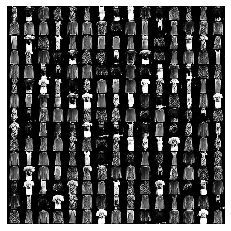

batch 0, g_loss : 2.356125, d_loss : 0.260071
batch 100, g_loss : 5.440233, d_loss : 0.348289
batch 200, g_loss : 2.401612, d_loss : 0.197861

-------------------------------
Epoch : 18


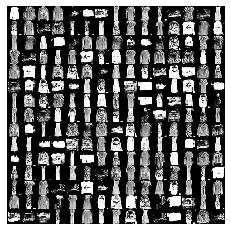

batch 0, g_loss : 2.735965, d_loss : 0.171527
batch 100, g_loss : 3.631885, d_loss : 0.190212
batch 200, g_loss : 4.136467, d_loss : 0.241728

-------------------------------
Epoch : 19


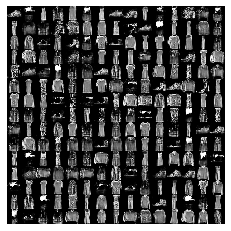

batch 0, g_loss : 3.598587, d_loss : 0.197531
batch 100, g_loss : 4.112269, d_loss : 0.148290
batch 200, g_loss : 2.279536, d_loss : 0.182793


In [53]:
batch = 225
epochs = 20
g_model, d_model = train_gan(X_train,y_train, batch, epochs, g_model, d_model)

## Generate image


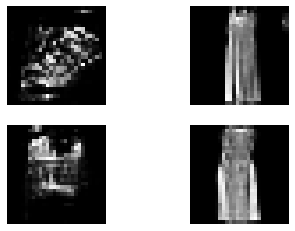

In [54]:
seed = np.random.uniform(-1, 1, (4, 100))
images = g_model.predict(seed)

for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow(np.reshape(images[i], (28,28,)),cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

### Generate image from generator

In [0]:
def generate_images(g, batch_size):
    z_size = g.layers[0].input_shape[1]
    noise = np.random.uniform(-1, 1, (batch_size, z_size))
    generated_images = g.predict(noise, verbose=1)
    image = combine_images(generated_images)
    filename = "generated_image.png"
    image = image*127.5+127.5
    Image.fromarray(image.astype(np.uint8)).save(filename)
    return image

100/100 [==============================] - 0s 123us/sample


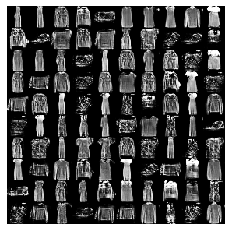

In [56]:
images = generate_images(g_model, 100)
plt.imshow(images, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### Generate image with the check of discriminator

In [0]:
def generate_best_images(g, d, batch_size):
    z_size = g.layers[0].input_shape[1]
    noise = np.random.uniform(-1, 1, (batch_size*20, z_size))

    generated_images = g.predict(noise, verbose=1)
    d_pret = d.predict(generated_images, verbose=1)

    index = np.arange(0, batch_size*20)
    index.resize((batch_size*20, 1))

    pre_with_index = list(np.append(d_pret, index, axis=1))
    pre_with_index.sort(key=lambda x: x[0], reverse=True)

    nice_images = np.zeros((batch_size,) + generated_images.shape[1:3], dtype=np.float32)
    nice_images = nice_images[:, :, :, None]

    for i in range(batch_size):
        idx = int(pre_with_index[i][1])
        nice_images[i, :, :, 0] = generated_images[idx, :, :, 0]

    image = combine_images(nice_images)
    filename = "generated_image_best.png"
    image = image*127.5+127.5
    Image.fromarray(image.astype(np.uint8)).save(filename)
    return image

2000/2000 [==============================] - 0s 149us/sample


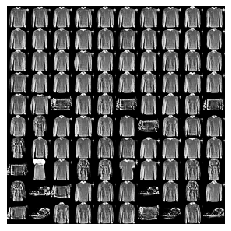

In [58]:
images = generate_best_images(g_model, d_model, 100)
plt.imshow(images, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

#  <font color="red">**QUESTION 9**</font> 
what is the differences between images that are not checked by discriminator (directly generated from generator), and images that previously checked by discriminator?
- [ ] The unchecked images are smaller in size
- [x] The checked images are usually better 
- [ ] The unchecked images are usually better
- [ ] The checked images are smaller in size

#  <font color="red">**QUESTION 10**</font> 
What do you think about losses over time while training ? 
- [ ] It will be minimized overtime
- [ ] It will be maximized overtime
- [x] It will just fluctuate randomly